In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install unidecode
!pip install pyLDAvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=d316f64a597fbe113ee82fee475042f3a2444972fb6766633363dab4e9e822e4
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator # libreria para traducir
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
from unidecode import unidecode
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from gensim import corpora
from gensim.models import LdaModel,CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

Mounted at /content/gdrive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
stop_words_nltk_en =list(set(stopwords.words('english')))
stop_words_nltk_en =["u","ok", *stop_words_nltk_en]
stop_words_nltk_es =list(set(stopwords.words('spanish')))
stop_words_nltk_es2 =[]
for i in stop_words_nltk_es:
  stop_words_nltk_es2.append(unidecode(i))
def texto_limpio(texto, idioma ="en"):
  """
  Recibe un texto
  Retorna un texto sin simbolos, sin stopwords, en minusculas
  idioma = en (inglés) o es (español)
  """
  texto_limpio=str(texto).lower()
  # blob = TextBlob(texto_limpio )
  # texto_limpio= blob.correct().string
  texto_limpio= re.sub(r'https?://\S+|www\.\S+', ' ', texto_limpio)  # eliminar la URL
  if idioma=="es":
    texto_limpio = unidecode(texto_limpio) # elimina los acentos y ñ
  texto_limpio= re.sub(r"[^A-Za-z]+",' ',texto_limpio) # Eliminar simbolos
  texto_limpio = texto_limpio.split() # seperacion de tokens
  if idioma=="en":
    texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_en] # eliminacción de stop word
  elif idioma=="es":
    texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_es] # eliminacción de stop word
  texto_limpio=' '.join(texto_limpio)
  return texto_limpio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Noticias de Colombia LDA

El objetivo es implementar técnicas de segmentación para determinar las temáticas.

Seleccionamos una muestra de tamaño 5000 y trabajaremos con el título de la noticia.



In [ ]:
datos_bancolombia= pd.read_csv("/content/gdrive/MyDrive/Aprendizaje no supervisado/2024-2/Bases de datos/noticias.csv")
datos_bancolombia = datos_bancolombia.sample(5000, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Limpieza de datos general

In [ ]:
datos_bancolombia["news_title_limpio"]= datos_bancolombia["news_title"].apply(lambda x: texto_limpio(x, idioma="es"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


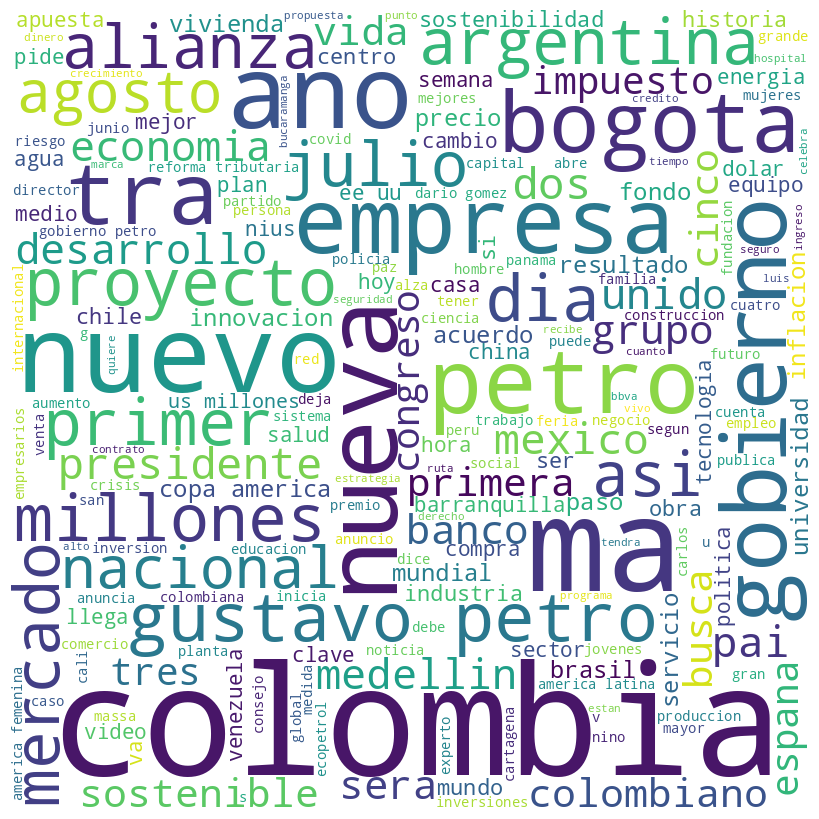

In [ ]:
texto_join =  " ".join(datos_bancolombia["news_title_limpio"])
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_join)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Representación de características, contamos con un total de 10800 palabras únicas. Podemos modificar el parámetro de min_df tolerando la frecuencia mínima de cada palabra para considerar en la representación de características.

In [ ]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(datos_bancolombia["news_title_limpio"])
X_count.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5000, 10800)

In [ ]:
# Usar el mismo conjunto de textos
tfidf_vectorizer = TfidfVectorizer(min_df=10)
X_tfidf = tfidf_vectorizer.fit_transform(datos_bancolombia["news_title_limpio"])
X_tfidf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5000, 570)

Como vimos en la clase anterior, con esta representación podemos implementar algoritmos de segmentación como K-means para segmentar los textos.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


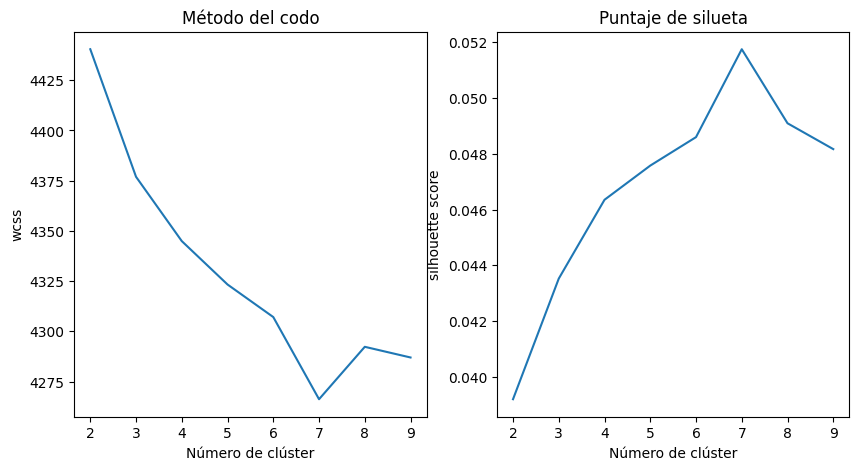

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=42)
  k_means.fit(X_tfidf)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(X_tfidf, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

¿Cuál sería la cantidad de clústeres?

In [ ]:
k_means=KMeans(7, random_state=42)
k_means.fit(X_tfidf)
datos_bancolombia["labels_kmeans"]=k_means.labels_
datos_bancolombia["labels_kmeans"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
labels_kmeans,
0,4165
2,265
6,206
1,130
3,101
4,72
5,61


In [ ]:
import math
# Obtener los valores únicos de labels_kmeans
labels_unicos = datos_bancolombia["labels_kmeans"].unique()

# Definir el número de filas y columnas
num_columnas = 2
num_filas =  math.ceil(len(labels_unicos) / num_columnas)  # Calcular el número de columnas necesarias


# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 20))  # Ajustar el tamaño total del gráfico
axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

# Generar una nube de palabras por cada valor único en labels_kmeans
for i, label in enumerate(labels_unicos):
    # Unir los textos que corresponden al label actual
    filtro_cluster=datos_bancolombia["labels_kmeans"] == label
    texto_join = " ".join(datos_bancolombia.loc[filtro_cluster, "news_title_limpio"])

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(texto_join)

    # Mostrar la nube de palabras en el subplot correspondiente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Clúster {label}", fontsize=16)

# Eliminar cualquier subplot vacío (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout(pad=3)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### ¿Qué son los *n-grams*?

Los *n-grams* son secuencias de palabras consecutivas en un texto. Dependiendo de la cantidad de palabras en la secuencia, los *n-grams* se clasifican como:
- **Unigrama (1-gram)**: una sola palabra.
- **Bigrama (2-gram)**: una secuencia de dos palabras.
- **Trigrama (3-gram)**: una secuencia de tres palabras.
  
El uso de *n-grams* es común en el procesamiento de lenguaje natural (NLP), ya que captura no solo las palabras individuales, sino también la relación entre palabras cercanas, proporcionando contexto.


In [ ]:
# Lista de documentos de ejemplo
documentos = ["La inteligencia artificial es fascinante",
              "El aprendizaje profundo está transformando la IA",
              "Los modelos de lenguaje natural son poderosos"]

# Crear CountVectorizer para generar unigramas, bigramas y trigramas
vectorizer = CountVectorizer(ngram_range=(1, 3), min_df=1)

# Ajustar el vectorizador a los documentos y transformar los textos en una matriz de cuenta de n-grams
X_ngrams = vectorizer.fit_transform(documentos)

# Obtener los n-grams generados
ngrams = vectorizer.get_feature_names_out()

# Mostrar los n-grams
print("n-grams generados:")
for ngram in ngrams:
    print(ngram)

# Mostrar la matriz de cuenta de n-grams
print("Matriz de cuenta de n-grams:")
print(X_ngrams.toarray())

n-grams generados:
aprendizaje
aprendizaje profundo
aprendizaje profundo está
artificial
artificial es
artificial es fascinante
de
de lenguaje
de lenguaje natural
el
el aprendizaje
el aprendizaje profundo
es
es fascinante
está
está transformando
está transformando la
fascinante
ia
inteligencia
inteligencia artificial
inteligencia artificial es
la
la ia
la inteligencia
la inteligencia artificial
lenguaje
lenguaje natural
lenguaje natural son
los
los modelos
los modelos de
modelos
modelos de
modelos de lenguaje
natural
natural son
natural son poderosos
poderosos
profundo
profundo está
profundo está transformando
son
son poderosos
transformando
transformando la
transformando la ia
Matriz de cuenta de n-grams:
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 1 1 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
  1 1 1 0 0 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Si aplicamos n-grams con n=3, tendremos demasiadas palabras.

In [ ]:
# Usar el mismo conjunto de textos
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_tfidf = tfidf_vectorizer.fit_transform(datos_bancolombia["news_title_limpio"])
X_tfidf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5000, 56534)

Para este caso es ideal el parámetro min_df.

In [ ]:
# Usar el mismo conjunto de textos
tfidf_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 3))
X_tfidf = tfidf_vectorizer.fit_transform(datos_bancolombia["news_title_limpio"])
X_tfidf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5000, 606)

¿Cómo cambian los resultados si aplicamos K-means con n-grams?

## Asignación Latente de Dirichlet (LDA)

La Asignación Latente de Dirichlet (LDA, por sus siglas en inglés) es un modelo generativo probabilístico utilizado para descubrir temas ocultos en una colección de documentos. Este modelo asume que cada documento es una mezcla de varios temas, y que cada tema es una distribución de palabras.

### Cómo funciona LDA:
1. **Documentos como mezclas de temas**: LDA asume que cada documento está compuesto por varios temas en diferentes proporciones.
2. **Temas como distribuciones de palabras**: Cada tema se caracteriza por una distribución sobre palabras, donde algunas palabras tienen mayor probabilidad de aparecer en ese tema.
3. **Distribuciones Dirichlet**: LDA utiliza distribuciones de Dirichlet para modelar la distribución de temas en los documentos y la distribución de palabras en los temas.


Para esto necesitamos un diccionario de palabras y una columna con los tokens.



In [ ]:
count_vectorizer = CountVectorizer(min_df=10,ngram_range=(1, 3))
X_count = count_vectorizer.fit_transform(datos_bancolombia["news_title_limpio"])
count_vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['abre', 'accidente', 'acciones', 'acueducto', 'acuerdo', 'agenda',
       'agosto', 'agua', 'ahora', 'ahorro', 'alberto',
       'alberto fernandez', 'alcaldia', 'alerta', 'alianza', 'alianzas',
       'alimentos', 'alta', 'alto', 'alza', 'amazon', 'ambiental',
       'ambiente', 'america', 'america femenina', 'america latina',
       'andres', 'ano', 'anos', 'antioquia', 'anuncia', 'anuncio',
       'apoyo', 'aprueba', 'apuesta', 'argentina', 'argentino', 'asi',
       'atencion', 'atlantico', 'atletico', 'aumenta', 'aumento', 'aun',
       'autoridades', 'autos', 'avanza', 'ayuda', 'baja', 'bajo', 'banca',
       'banco', 'bancos', 'barranquilla', 'batakis', 'bbva', 'bebidas',
       'bid', 'biden', 'bienes', 'billones', 'bogota', 'bolivar', 'bolsa',
       'bonos', 'brasil', 'bucaramanga', 'bus', 'busca', 'buscan', 'cada',
       'cafe', 'caldas', 'cali', 'calidad', 'calle', 'calor', 'cambio',
       'cambios', 'camino', 'campana', 'campo', 'canal', 'capital',
       'carbono

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

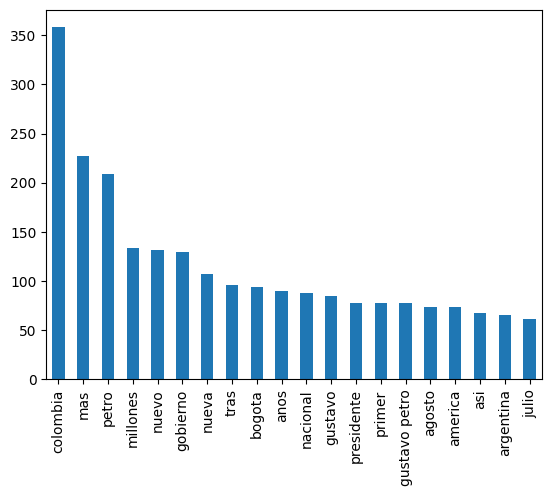

In [ ]:
datos_count=pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
datos_count.sum().sort_values(ascending=False).iloc[0:20].plot(kind="bar")

In [ ]:
count_vectorizer = CountVectorizer(min_df=10)
X_count = count_vectorizer.fit_transform(datos_bancolombia["news_title_limpio"])
datos_bancolombia["tokens"]=datos_bancolombia["news_title_limpio"].apply(lambda x: x.split())
datos_bancolombia["tokens"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tokens
2734,"[comida, alimento, alimento, medicina]"
15764,"[viviendas, sociales, bairro, da, cruz, vermel..."
2168,"[quindio, universidad, mayores]"
5843,"[colombia, paraguay, semifinales, conmebol, copa]"
8629,"[recuerdan, redes, hombre, encontro, hada]"
...,...
5050,"[confianza, economia, eurozona, desciende, men..."
3354,"[ac, capitales, compra, participacion, doble, ..."
22463,"[sector, ferretero, sigue, creciendo]"
1321,"[petrobras, busca, soluciones, exploracion, ec..."


In [ ]:
# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([count_vectorizer.get_feature_names_out() ])
corpus = [dictionary.doc2bow(text.split()) for text in datos_bancolombia["news_title_limpio"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:



coherence_values = [] # parametro determinar tópicos
model_list = {} # modelos de tópicos
topicos_num= range(2,10)
for num_topics in topicos_num:
    model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='auto',
                                    per_word_topics=True)
    model_list[num_topics] = model
    coherencemodel = CoherenceModel(model=model, texts=datos_bancolombia["tokens"], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


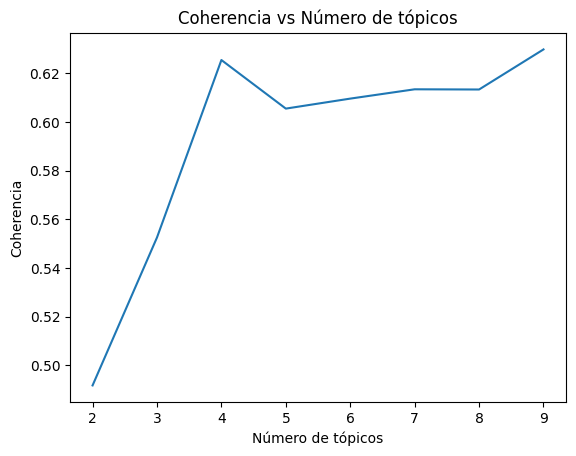

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Número de tópicos")
plt.ylabel("Coherencia")
plt.title("Coherencia vs Número de tópicos")
plt.show()

In [ ]:

# Visualización interactiva
vis = pyLDAvis.gensim_models.prepare(model_list[4], corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = model_list[7].print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.065*"nuevo" + 0.056*"nueva" + 0.056*"gobierno" + 0.047*"nacional" + 0.036*"asi" + 0.022*"banco" + 0.019*"industria" + 0.018*"espana" + 0.017*"estan" + 0.017*"mercado"')
(1, '0.074*"millones" + 0.037*"mexico" + 0.033*"vida" + 0.027*"innovacion" + 0.026*"empresas" + 0.026*"reforma" + 0.023*"tributaria" + 0.022*"capital" + 0.022*"primera" + 0.022*"vez"')
(2, '0.097*"petro" + 0.041*"dos" + 0.038*"gustavo" + 0.036*"presidente" + 0.025*"congreso" + 0.022*"sera" + 0.021*"puede" + 0.019*"universidad" + 0.019*"duque" + 0.018*"investigacion"')
(3, '0.137*"colombia" + 0.050*"tras" + 0.028*"julio" + 0.026*"mundial" + 0.025*"pais" + 0.025*"copa" + 0.024*"dolar" + 0.022*"dia" + 0.017*"venezuela" + 0.015*"anuncio"')
(4, '0.047*"america" + 0.041*"nuevas" + 0.040*"agosto" + 0.036*"alianza" + 0.032*"economia" + 0.025*"acuerdo" + 0.024*"sigue" + 0.024*"oficial" + 0.021*"dice" + 0.020*"gas"')
(5, '0.046*"argentina" + 0.038*"proyecto" + 0.032*"desarrollo" + 0.027*"unidos" + 0.025*"ser" + 0.023*"tres

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Asignación de clúster o tópico.

In [ ]:
document_topics = model_list[7].get_document_topics(corpus)
dominant_topics = []
for doc_topics in document_topics:
    # Ordenar los tópicos por probabilidad y tomar el de mayor valor
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  # x[1] es la probabilidad, x[0] es el ID del tópico
    dominant_topics.append(dominant_topic)
datos_bancolombia["dominant_topic"] = dominant_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_bancolombia["dominant_topic"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
dominant_topic,
2,1801
6,819
4,694
3,552
0,461
1,357
5,316


Con los datos de IPhone Customer Reviews | NLP, con la columna de reviewDescriptionsort implementar LDA.

In [ ]:
datos_iphone= pd.read_csv("/content/gdrive/MyDrive/Aprendizaje no supervisado/2024-2/Bases de datos/iphone.csv")
datos_iphone


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
